In [1]:
import random as rd
import sage.misc.prandom
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

# Génération de lois continues

In [2]:
def VAuniforme(a, b):
    return (rd.random() * abs(a - b)) + a

In [3]:
print("Test V A uniforme sur 1 - 10 : ", VAuniforme(1, 10));

Test V A uniforme sur 1 - 10 :  6.748269911443308


In [4]:
echantillon_exp = []
echantillon_gamma = []
echantillon_normal = []
a = 10
b = 4
for i in range(1000000):
    echantillon_exp.append(expovariate(a))
    echantillon_gamma.append(gammavariate(a, b))
    echantillon_normal.append(normalvariate(a, b))

print("Résultats loi exponontielle de 1000 échantillons")
print("    moyenne empirique : ", np.mean(echantillon_exp), ", variance empirique : ", np.var(echantillon_exp), "\n")

print("Résultats loi gamma de 1000 échantillons")
print("    moyenne empirique : ", np.mean(echantillon_gamma), ", variance empirique : ", np.var(echantillon_gamma), "\n")

print("Résultats loi normale de 1000 échantillons")
print("    moyenne empirique : ", np.mean(echantillon_normal), ", variance empirique : ", np.var(echantillon_normal))

Résultats loi exponontielle de 1000 échantillons
    moyenne empirique :  0.10004589828197087 , variance empirique :  0.010029078318754119 

Résultats loi gamma de 1000 échantillons
    moyenne empirique :  39.996196290451614 , variance empirique :  159.72907526402312 

Résultats loi normale de 1000 échantillons
    moyenne empirique :  9.994992438315153 , variance empirique :  15.979594599667625


- On s'attends pour la loi exponontielle une esperence de 1/a et une variance de 1/a*a
- On s'attends pour la loi gamma une esperence de a*b et une variance de a*(b*b)
- On s'attends pour la loi normale une esperence de a et une variance de a*a

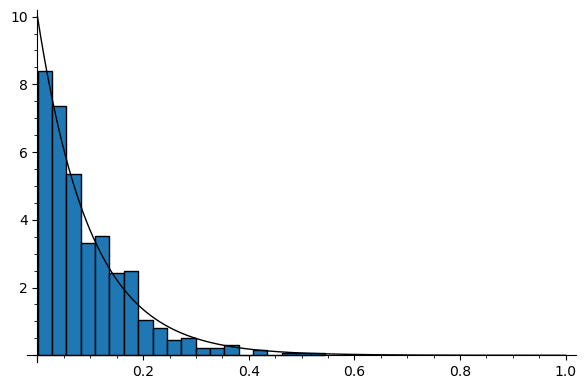

In [5]:
plt1 = histogram(echantillon_exp[0:500], bins=20, density=True)
plt2 = plot(a * exp(-a * x), (x, 0, 1), color="black")

show(plt1 + plt2)

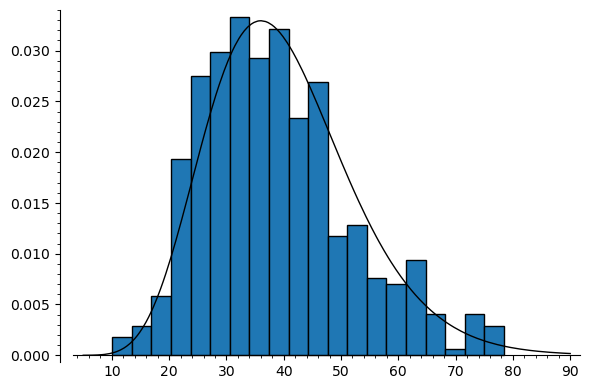

In [6]:
plt1 = histogram(echantillon_gamma[0:500], bins=20, density=True)
plt2 = plot(((x ** (a - 1) * exp(-x / b)) / (gamma(a) * (b ** a))), (x, 5, 90), color="black")

show(plt1 + plt2)

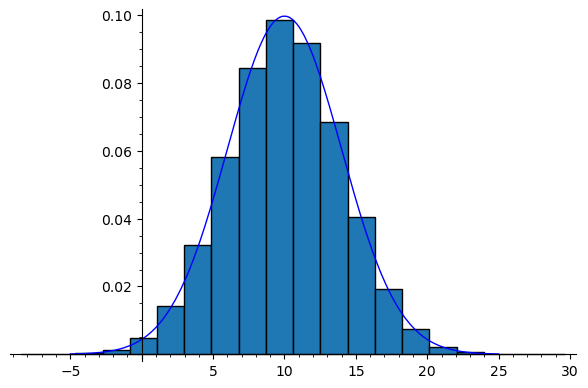

In [7]:
plt1 = histogram(echantillon_normal, bins=20, density=True)
plt2 = plot(((1 / (sqrt(2 * pi * b ** 2))) * exp((-(x - a) ** 2) / (2 * (b ** 2)))), (x, -5, 25))

show(plt1 + plt2)

# Programmation du test du chi 2

## Ajustement à la loi de Poisson

### Fonction DistTheoriquePoisson

- Supposant que LoiDiscObs est un tableau prenant en [0] les differentes modalites en tableau et en [1] l'effectif pour chaque modalite
- Lamb est parametre de la loi de Poisson

In [8]:
def DistTheoriquePoisson(LoiDiscObs, Lamb):
    distr = []
    N = sum(LoiDiscObs[0])
    for i in range(len(LoiDiscObs[0])):
        x_obs = LoiDiscObs[1][i]
        prob_x_obs = exp(-Lamb) * (Lamb ** x_obs) / factorial(x_obs)
        distr.append(prob_x_obs * N)
        
    return distr

In [9]:
def DistanceChiDeux(EffObs, EffTheorique):
    dist = 0
    
    for i in range(len(EffObs)):
        dist += ((EffObs[i] - EffTheorique[i]) ** 2) / EffTheorique[i]
    return dist        

## Convergence de la loi binomiale vers la loi de Poisson

In [10]:
def Bernoulli(p):
    return 1 if random() < p else 0

In [11]:
def Binomiale(n, p):
    somme_de_Bers = 0
    
    for i in range(n):
        somme_de_Bers += Bernoulli(p)
        
    return somme_de_Bers

In [12]:
def LoiDiscreteObs(L, a, b):
    eff = []
    
    for i in range(len(L) - 1, -1, -1):
        if L[i] < a or L[i] > b:
            L.pop(i)
            
    elt = [*set(L)]
    elt.sort()
    for j in elt:
        eff.append(L.count(j))
        
    return [eff, elt]

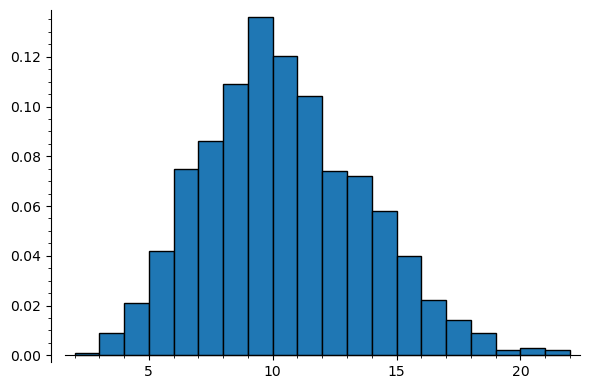

In [13]:
N = 1000
p = 0.01
Binoms = []
for i in range(1, N):
    Binoms.append(Binomiale(N, p))

show(histogram(Binoms, bins=20, density=True))

- Prenons comme Hypothese_0 que la loi binomiale CV vers la loi de poisson quand n grand p petit et Hypothese_1 la negation de la premiere
- on prend intervalle de confiance 95% c a d, que 1 - alpha = 0.95 et alpha 0.05

In [14]:
ObservationsLoi = LoiDiscreteObs(Binoms, 0, 20)

print(numerical_approx(DistanceChiDeux(ObservationsLoi[0], DistTheoriquePoisson(ObservationsLoi, 10))))

14.4449679075486


- on remarque ici donne ici un resultat assez faible pour un echantillon de 1000 resultats
- on peut garder ainsi l'hypothese_0

## Ajustement à la loi exponentielle

In [15]:
def DistTheoriqueExp(LoiObs, Lamb):
    distrib = []
    N = sum(LoiObs[0])
    taille_LoiObs = len(LoiObs[1])
    
    a = b = LoiObs[1][taille_LoiObs - 1]
    b = +Infinity
    
    LoiObs[1][taille_LoiObs - 1] = [1, b]
    
    for i in range(taille_LoiObs):
        a = b = LoiObs[1][i]
        
        proba_x_obs = exp(-a * Lamb) - exp(-b * Lamb) # apres calcul de la primitive
        distrib.append(proba_x_obs * N)
    
    return distrib

SyntaxError: invalid syntax (<ipython-input-16-7b18d017f89f>, line 1)

## Ajustement à la loi normale

In [35]:
def DistTheoriqueNorm(LoiObs, moy, sig):
    distrib = []
    taille_LoiObs = len(LoiObs[1])
    N = sum(LoiObs[0])
    
    a, b = LoiObs[1][taille_LoiObs - 1]
    b = +Infinity
    LoiObs[1][taille_LoiObs - 1] = (a, b)
    
    for i in range(taille_LoiObs):
        a, b = LoiObs[1][i]
        proba_x_obs, err = numerical_integral((1 / sqrt(2 * pi * sig ** 2)) * exp(- ((x + moy) ** 2) / (2 * sig ** 2)), a, b)
        distrib.append(proba_x_obs * N)
        
    return distrib

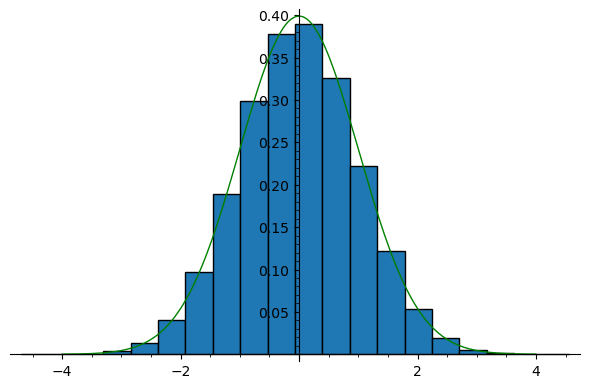

In [59]:
moy = 0
sig = 1

gaussienne_obs = []
for i in range(1000000):
    gaussienne_obs.append(normalvariate(moy, sig))
    
plt1 = histogram(gaussienne_obs, bins=20, density=True)
plt2 = plot((1 / sqrt(2 * pi * sig ** 2)) * exp(- ((x + moy) ** 2) / (2 * sig ** 2)), (x, -4, 4), color="green")

plot(plt1 + plt2)

In [52]:
gaussienne_obs = finance.TimeSeries(gaussienne_obs)
LoiObs = gaussienne_obs.histogram(20)

print(DistanceChiDeux(LoiObs[0], DistTheoriqueNorm(LoiObs, 0, 1)))

18.102280925203758


# Théorème central limite avec SageMath

In [ ]:
def Echantillon_Means_Emp_Gamma(m, n, alpha, beta):
    res = []
    
    for i in range(m):
        means_list = []
        
        for k in range(n):
            means_list.append(gammavariate(alpha, beta))
        
        res.append(mean(means_list))
        
    return res

In [ ]:
gammas = Echantillon_Means_Emp_Gamma(1000, 200, 5, 1/2)
gammas_mean = mean(gammas)
denominateur = sqrt(variance(gammas))

TCL = []

for gamma_mean_obs in gammas:
    TCL.append( (gamma_mean_obs - gammas_mean) / denominateur )
    
plt1 = histogram(TCL, bins=20, density=True)
plt2 =  plot(((1 / (sqrt(2 * pi))) * exp((-(x - 0) ** 2) / (2))), (x, -3, 3))

show(plt1 + plt2)

In [65]:
print(numerical_approx(DistanceChiDeux(LoiObs[0], DistTheoriqueNorm(LoiObs, moy, sig))))

23.2055006662894
